# Banking Case Study (Credit Risk Scoring)

# Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
bank_df = pd.read_csv(r'C:\Data\banking_clean_dataset.csv')

In [3]:
bank_df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


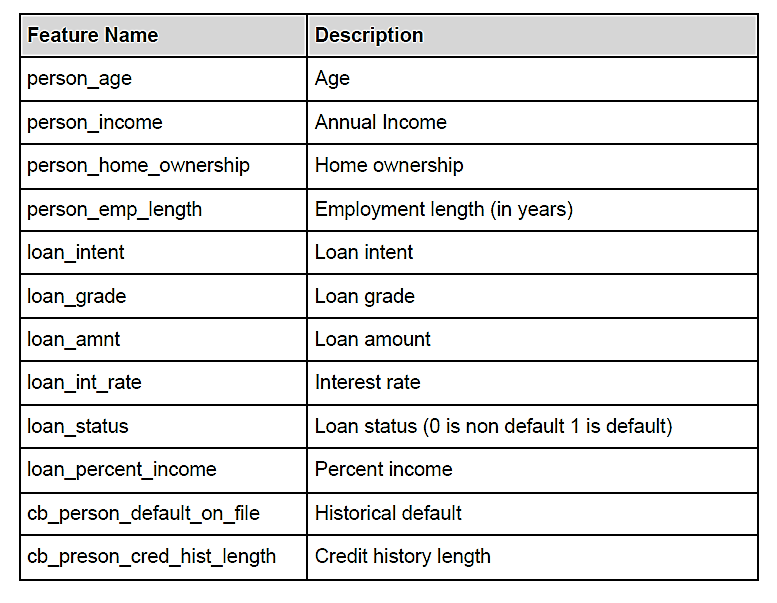

In [4]:
bank_df.columns

Index(['Unnamed: 0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
bank_df.index

RangeIndex(start=0, stop=28494, step=1)

In [6]:
bank_df.shape

(28494, 13)

In [7]:
bank_df.isna().sum()

Unnamed: 0                    0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Machine Learning

#### Target Variable: Loan Status

In [8]:
# Shifting target column at the right corner of the table
bank_df.columns

Index(['Unnamed: 0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [9]:
bank_df = bank_df[['Unnamed: 0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']]

In [10]:
bank_df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
1,1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
2,2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
3,3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
4,4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1


## a. Identify the Target Variable and Splitting the Data into Train and Test

In [11]:
import sklearn

print(sklearn.__version__)

1.1.2


In [12]:
y = bank_df["loan_status"]
X = bank_df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [13]:
# split the data into train and test
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.75,random_state=786)

In [15]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10032,26,56000,RENT,10.0,HOMEIMPROVEMENT,B,10000,12.69,0.18,N,2
897,21,24000,OWN,2.0,MEDICAL,B,7000,11.86,0.29,N,2
16773,32,30996,MORTGAGE,1.0,EDUCATION,C,2400,13.80,0.08,Y,7
17070,27,34560,MORTGAGE,8.0,HOMEIMPROVEMENT,E,10625,16.40,0.31,N,7
8253,26,74000,RENT,2.0,EDUCATION,C,8000,13.92,0.11,N,3


In [16]:
X_train.shape

(21370, 11)

In [17]:
X_test.shape

(7124, 11)

In [18]:
y_train.shape

(21370,)

In [19]:
y_test.shape

(7124,)

## b. Separating Categorical and Numerical Columns:

In [20]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10032,26,56000,RENT,10.0,HOMEIMPROVEMENT,B,10000,12.69,0.18,N,2
897,21,24000,OWN,2.0,MEDICAL,B,7000,11.86,0.29,N,2
16773,32,30996,MORTGAGE,1.0,EDUCATION,C,2400,13.80,0.08,Y,7
17070,27,34560,MORTGAGE,8.0,HOMEIMPROVEMENT,E,10625,16.40,0.31,N,7
8253,26,74000,RENT,2.0,EDUCATION,C,8000,13.92,0.11,N,3


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21370 entries, 10032 to 25374
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  21370 non-null  int64  
 1   person_income               21370 non-null  int64  
 2   person_home_ownership       21370 non-null  object 
 3   person_emp_length           21370 non-null  float64
 4   loan_intent                 21370 non-null  object 
 5   loan_grade                  21370 non-null  object 
 6   loan_amnt                   21370 non-null  int64  
 7   loan_int_rate               21370 non-null  float64
 8   loan_percent_income         21370 non-null  float64
 9   cb_person_default_on_file   21370 non-null  object 
 10  cb_person_cred_hist_length  21370 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.0+ MB


In [22]:
X_train_cate = X_train.select_dtypes(include=['object'])
X_train_cate.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10032,RENT,HOMEIMPROVEMENT,B,N
897,OWN,MEDICAL,B,N
16773,MORTGAGE,EDUCATION,C,Y
17070,MORTGAGE,HOMEIMPROVEMENT,E,N
8253,RENT,EDUCATION,C,N


In [23]:
X_train_numr = X_train.select_dtypes(include=['int64','float64'])
X_train_numr.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10032,26,56000,10.0,10000,12.69,0.18,2
897,21,24000,2.0,7000,11.86,0.29,2
16773,32,30996,1.0,2400,13.80,0.08,7
17070,27,34560,8.0,10625,16.40,0.31,7
8253,26,74000,2.0,8000,13.92,0.11,3


## c. Scaling the Numerical Features

In [24]:
X_train_numr.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10032,26,56000,10.0,10000,12.69,0.18,2
897,21,24000,2.0,7000,11.86,0.29,2
16773,32,30996,1.0,2400,13.80,0.08,7
17070,27,34560,8.0,10625,16.40,0.31,7
8253,26,74000,2.0,8000,13.92,0.11,3


In [25]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_numr_rescaled = pd.DataFrame(scaler.fit_transform(X_train_numr),
                                    columns=X_train_numr.columns,
                                    index=X_train_numr.index)
X_train_numr_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10032,-0.279049,-0.202817,1.292637,0.056982,0.508833,0.094698,-0.940598
897,-1.089543,-0.826726,-0.693444,-0.419684,0.252857,1.123050,-0.940598
16773,0.693543,-0.690323,-0.941704,-1.150573,0.851163,-0.840167,0.298954
17070,-0.116951,-0.620836,0.796117,0.156287,1.653018,1.310023,0.298954
8253,-0.279049,0.148132,-0.693444,-0.260796,0.888172,-0.559707,-0.692688


## d. Applying OneHotEncoding on Categorical Columns

In [26]:
# seperating column for onehotencoding on categorical column 
X_train_cate_ohe_column = X_train_cate[['person_home_ownership','loan_intent','cb_person_default_on_file']]

In [27]:
X_train_cate_ohe_column['person_home_ownership'].value_counts(normalize=True)

RENT        0.507253
MORTGAGE    0.413243
OWN         0.076603
OTHER       0.002901
Name: person_home_ownership, dtype: float64

In [28]:
X_train_cate_ohe_column['loan_intent'].value_counts(normalize=True)

EDUCATION            0.201965
MEDICAL              0.185073
VENTURE              0.173046
PERSONAL             0.167384
DEBTCONSOLIDATION    0.161161
HOMEIMPROVEMENT      0.111371
Name: loan_intent, dtype: float64

In [29]:
X_train_cate_ohe_column['cb_person_default_on_file'].value_counts(normalize=True)

N    0.820777
Y    0.179223
Name: cb_person_default_on_file, dtype: float64

In [30]:
# Applying onehotencodig on categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cate_ohe = pd.DataFrame(encoder.fit_transform(X_train_cate_ohe_column),
                                columns=encoder.get_feature_names_out(X_train_cate_ohe_column.columns),
                                index = X_train_cate_ohe_column.index)
X_train_cate_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
10032,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
897,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16773,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17070,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8253,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## e. Applying Label Encoding on Categorical Columns

In [31]:
X_train_cate_le_column = pd.DataFrame(X_train_cate['loan_grade'])

In [32]:
X_train_cate_le_column.head()

,loan_grade
10032,B
897,B
16773,C
17070,E
8253,C


In [33]:
X_train_cate_lable = pd.DataFrame(index=X_train_cate_le_column.index)
X_train_cate_lable.head()

""
10032
897
16773
17070
8253


In [34]:
X_train_cate.loan_grade.unique()

array(['B', 'C', 'E', 'D', 'A', 'F', 'G'], dtype=object)

In [35]:
loan_grade_encoder = {'G':1,'F':2,'E':3,'D':4,'C':5,'B':6,'A':7}

X_train_cate_lable['loan_grade'] = X_train_cate['loan_grade'].apply(lambda x:loan_grade_encoder[x])

X_train_cate_lable.head()

,loan_grade
10032,6
897,6
16773,5
17070,3
8253,5


### f. Concatinating the Encoded Categorical Features,Label Features and Rescaled Numerical Features:

In [36]:
X_train_transformed = pd.concat([X_train_numr_rescaled,X_train_cate_lable,X_train_cate_ohe],axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
10032,-0.279049,-0.202817,1.292637,0.056982,0.508833,0.094698,-0.940598,6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
897,-1.089543,-0.826726,-0.693444,-0.419684,0.252857,1.123050,-0.940598,6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16773,0.693543,-0.690323,-0.941704,-1.150573,0.851163,-0.840167,0.298954,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17070,-0.116951,-0.620836,0.796117,0.156287,1.653018,1.310023,0.298954,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8253,-0.279049,0.148132,-0.693444,-0.260796,0.888172,-0.559707,-0.692688,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


### g. Preparing Test Data

In [37]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
12984,22,43000,RENT,0.0,EDUCATION,A,15000,8.49,0.35,N,2
6664,25,54000,MORTGAGE,4.0,MEDICAL,B,8400,11.11,0.16,N,4
11349,24,80000,RENT,5.0,MEDICAL,B,12000,12.69,0.15,N,2
2591,21,24000,RENT,3.0,DEBTCONSOLIDATION,C,3200,13.57,0.13,N,4
22640,35,91000,MORTGAGE,14.0,EDUCATION,A,4000,7.29,0.04,N,9


In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7124 entries, 12984 to 26993
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7124 non-null   int64  
 1   person_income               7124 non-null   int64  
 2   person_home_ownership       7124 non-null   object 
 3   person_emp_length           7124 non-null   float64
 4   loan_intent                 7124 non-null   object 
 5   loan_grade                  7124 non-null   object 
 6   loan_amnt                   7124 non-null   int64  
 7   loan_int_rate               7124 non-null   float64
 8   loan_percent_income         7124 non-null   float64
 9   cb_person_default_on_file   7124 non-null   object 
 10  cb_person_cred_hist_length  7124 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 667.9+ KB


In [39]:
X_test_cate = X_test.select_dtypes(include=['object'])

X_test_cate.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
12984,RENT,EDUCATION,A,N
6664,MORTGAGE,MEDICAL,B,N
11349,RENT,MEDICAL,B,N
2591,RENT,DEBTCONSOLIDATION,C,N
22640,MORTGAGE,EDUCATION,A,N


In [40]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12984,22,43000,0.0,15000,8.49,0.35,2
6664,25,54000,4.0,8400,11.11,0.16,4
11349,24,80000,5.0,12000,12.69,0.15,2
2591,21,24000,3.0,3200,13.57,0.13,4
22640,35,91000,14.0,4000,7.29,0.04,9


In [41]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                  columns=X_test_num.columns,
                                  index = X_test_num.index)
X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12984,-0.927444,-0.456280,-1.189964,0.851426,-0.786470,1.683969,-0.940598
6664,-0.441148,-0.241811,-0.196924,-0.197240,0.021553,-0.092275,-0.444777
11349,-0.603247,0.265115,0.051337,0.374759,0.508833,-0.185761,-0.940598
2591,-1.089543,-0.826726,-0.445184,-1.023462,0.780230,-0.372734,-0.444777
22640,1.179839,0.479584,2.285678,-0.896351,-1.156556,-1.214113,0.794775


In [42]:
# Seperating categorical column into nominal and ordinal

X_test_cate_nominal = X_test_cate[['person_home_ownership','loan_intent','cb_person_default_on_file']]

X_test_cate_nominal.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
12984,RENT,EDUCATION,N
6664,MORTGAGE,MEDICAL,N
11349,RENT,MEDICAL,N
2591,RENT,DEBTCONSOLIDATION,N
22640,MORTGAGE,EDUCATION,N


In [43]:
X_test_cate_ohe = pd.DataFrame(encoder.transform(X_test_cate_nominal),
                                columns=encoder.get_feature_names_out(X_test_cate_nominal.columns),
                                index = X_test_cate_nominal.index)

X_test_cate_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
12984,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6664,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11349,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2591,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X_test_cate_lable = pd.DataFrame(index=X_test_cate.index)
X_test_cate_lable.head()

""
12984
6664
11349
2591
22640


In [45]:
X_test_cate_lable['loan_grade'] = X_test_cate['loan_grade'].apply(lambda x: loan_grade_encoder[x])

X_test_cate_lable.head()

,loan_grade
12984,7
6664,6
11349,6
2591,5
22640,7


In [46]:
X_test_transformed  = pd.concat([X_test_num_rescaled,X_test_cate_lable,X_test_cate_ohe],axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
12984,-0.927444,-0.456280,-1.189964,0.851426,-0.786470,1.683969,-0.940598,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6664,-0.441148,-0.241811,-0.196924,-0.197240,0.021553,-0.092275,-0.444777,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11349,-0.603247,0.265115,0.051337,0.374759,0.508833,-0.185761,-0.940598,6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2591,-1.089543,-0.826726,-0.445184,-1.023462,0.780230,-0.372734,-0.444777,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22640,1.179839,0.479584,2.285678,-0.896351,-1.156556,-1.214113,0.794775,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train_transformed,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_test_predict_LR = classification.predict(X_test_transformed)

In [106]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_predict_LR})

temp_df

,Actual,Predicted
12984,1,0
6664,0,0
11349,0,0
2591,0,0
22640,0,0
...,...,...
17859,0,1
20736,0,0
4807,0,0
11022,0,0


In [107]:
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test,y_test_predict_LR))
Logistic_Reg_Accuracy = (metrics.accuracy_score(y_test,y_test_predict_LR))*100
Logistic_Reg_Accuracy

Accuracy 0.8478382930937676


84.78382930937676

## Support vector Machines

In [108]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)

SVC()

In [109]:
y_test_predict_SVC = classifier.predict(X_test_transformed)

In [110]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_predict_SVC})
temp_df

,Actual,Predicted
12984,1,1
6664,0,0
11349,0,0
2591,0,0
22640,0,0
...,...,...
17859,0,0
20736,0,0
4807,0,0
11022,0,0


In [111]:
print('Accuracy',metrics.accuracy_score(y_test,y_test_predict_SVC))
SVC_Accuracy = metrics.accuracy_score(y_test,y_test_predict_SVC)*100
SVC_Accuracy

Accuracy 0.8870016844469399


88.700168444694

## KNN Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [84]:
y_test_predict_KNN = classifier.predict(X_test_transformed)

AttributeError: 'NoneType' object has no attribute 'split'

In [53]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_predict})
temp_df

,Actual,Predicted
12984,1,0
6664,0,0
11349,0,0
2591,0,0
22640,0,0
...,...,...
17859,0,1
20736,0,0
4807,0,0
11022,0,0


In [54]:
print('Accuracy',metrics.accuracy_score(y_test,y_test_predict))

Accuracy 0.8478382930937676


## Decision Tree Classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [113]:
y_test_predict_DT = classifier.predict(X_test_transformed)

In [114]:
temp_df = pd.DataFrame({'Aatual':y_test,'Predicted':y_test_predict_DT})
temp_df

,Aatual,Predicted
12984,1,1
6664,0,0
11349,0,0
2591,0,0
22640,0,0
...,...,...
17859,0,0
20736,0,0
4807,0,0
11022,0,0


In [115]:
print('Accuracy',metrics.accuracy_score(y_test,y_test_predict_DT))
DT_Accuracy = metrics.accuracy_score(y_test,y_test_predict_DT)*100
DT_Accuracy

Accuracy 0.8844750140370579


88.44750140370579

## Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [101]:
y_test_predict_RF = classifier.predict(X_test_transformed)

In [102]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_predict_RF})
temp_df

,Actual,Predicted
12984,1,1
6664,0,0
11349,0,0
2591,0,0
22640,0,0
...,...,...
17859,0,0
20736,0,0
4807,0,0
11022,0,0


In [103]:
print('Accuracy',metrics.accuracy_score(y_test,y_test_predict_RF))
Random_Forest_Accuracy = metrics.accuracy_score(y_test,y_test_predict_RF)*100
Random_Forest_Accuracy

Accuracy 0.9299550814149354


92.99550814149354

In [116]:
# Creating DataFrame of algorithm with there respective Accuracy
Loan_Credit_Risk_Prediction = pd.DataFrame({'ML_Algorithm':['Random_Forest_Accuracy','DT_Accuracy','SVC_Accuracy','Logistic_Reg_Accuracy'],
                                           'Accuracy':[Random_Forest_Accuracy,DT_Accuracy,SVC_Accuracy,Logistic_Reg_Accuracy]})

In [117]:
Loan_Credit_Risk_Prediction

,ML_Algorithm,Accuracy
0,Random_Forest_Accuracy,92.995508
1,DT_Accuracy,88.447501
2,SVC_Accuracy,88.700168
3,Logistic_Reg_Accuracy,84.783829


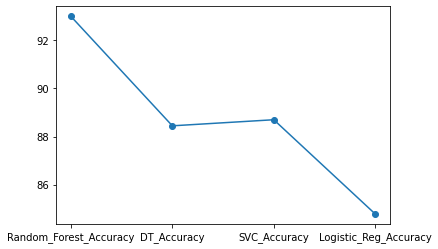

In [127]:
# Creating line chart of accuracy to understand in easyway
plt.plot(Loan_Credit_Risk_Prediction.ML_Algorithm,Loan_Credit_Risk_Prediction.Accuracy,marker='o')

### The overall conclusion is Random Forest Algorithm give more accuracy which is 92.99% as compared to other classifier.